# AdaBoost

In [63]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import random
import xgboost

In [14]:
def plotDecisionRegion(X, clf, pts):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.clf()
    cmap = plt.get_cmap('cool')
    plt.contourf(xx, yy, Z, alpha=0.2)
    i = 0
    for pt in pts:
        plt.scatter(pt[0], pt[1], cmap=cmap, label='Category {}'.format(i))
        i += 1
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

## Load some dummy data

We again use the moon dataset to create some dummy data for our classification.

In [15]:
X, y = make_moons(n_samples=500, noise=0.26)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Plot the training data

In [16]:
x_circ_1 = []
y_circ_1 = []
x_circ_2 = []
y_circ_2 = []
for i in range(len(y_train)):
    if y_train[i] == 0:
        x_circ_1.append(X_train[i][0])
        y_circ_1.append(X_train[i][1])
    else:
        x_circ_2.append(X_train[i][0])
        y_circ_2.append(X_train[i][1])

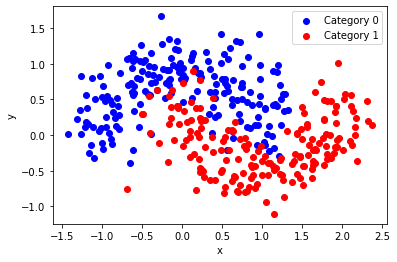

In [17]:
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Use AdaBoost

We use an AdaBoost classifier by using 200 *decision stumps*, i.e. decision trees with max_depth set to `1`:

In [18]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=20, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=20)

### Check the accuracy

In [19]:
y_predict = ada_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.928

### Plot the decision regions

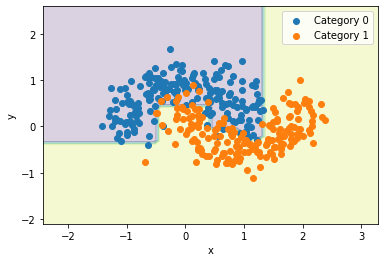

In [20]:
plotDecisionRegion(X_train, ada_clf, [[x_circ_1, y_circ_1], [x_circ_2, y_circ_2]])

# Gradient Boosted Regression Tree

## Create a dummy dataset

We use a dummy dataset (randomized quadratic data).

In [21]:
m = 100
X = np.random.rand(m,1)-0.5
y = X**2 + 0.09*np.random.rand(m,1)

X_sorted = []
for currX in X:
    X_sorted.append(currX[0])
X_sorted.sort()
X_pred = []
for currX in X_sorted:
    X_pred.append(np.array(currX))
X_pred = np.array(X_pred).reshape(m, 1)

## Plot the training data

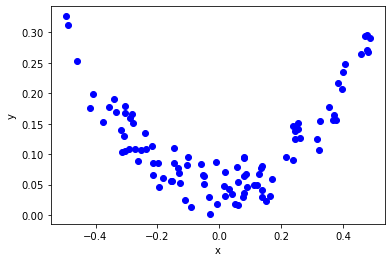

In [22]:
plt.scatter(X, y, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Train a decision tree regressor

In [23]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

## Plot the predictions

In [24]:
y_pred1 = tree_reg1.predict(X_pred)

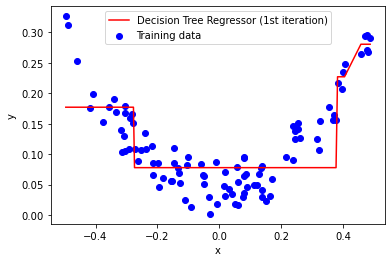

In [25]:
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred1, c='r', label='Decision Tree Regressor (1st iteration)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Train a second tree on the residual error

In [26]:
y2 = y - tree_reg1.predict(X).reshape(m, 1)

In [27]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

## Plot the predictions

In [28]:
y_pred2 = tree_reg2.predict(X_pred)

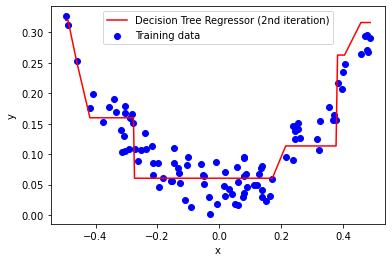

In [30]:
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred1 + y_pred2, c='r', label='Decision Tree Regressor (2nd iteration)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

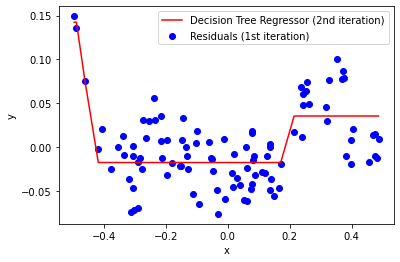

In [31]:
plt.scatter(X, y2, c='b', label='Residuals (1st iteration)')
plt.plot(X_pred, y_pred2, c='r', label='Decision Tree Regressor (2nd iteration)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Train a third tree on the residual error

In [32]:
y3 = y2 - tree_reg2.predict(X).reshape(m, 1)

In [33]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

## Plot the predictions

In [34]:
y_pred3 = tree_reg3.predict(X_pred)

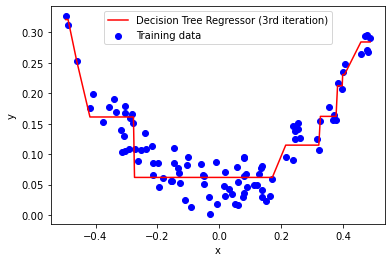

In [36]:
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred1 + y_pred2 + y_pred3, c='r', label='Decision Tree Regressor (3rd iteration)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

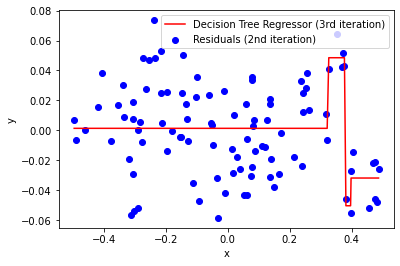

In [37]:
plt.scatter(X, y3, c='b', label='Residuals (2nd iteration)')
plt.plot(X_pred, y_pred3, c='r', label='Decision Tree Regressor (3rd iteration)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Using a Gradient Boosting Regressor

In [38]:
gbr_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbr_reg.fit(X, y.ravel())

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

## Plot the predictions

In [39]:
y_pred_gbr = gbr_reg.predict(X_pred)

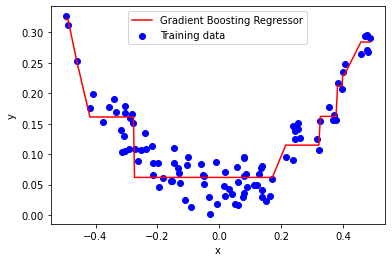

In [40]:
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred_gbr, c='r', label='Gradient Boosting Regressor')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Note that this produces the same output as in our third iteration (corresponding to `n_estimators=3`) as above.

## Dependence on the learning rate and number of estimators

By reducing the `learning_rate` and increasing the number `n_estimators` of trees, we can achieve a better generalization of the model (but beware overfitting).

In [41]:
gbr_reg2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gbr_reg2.fit(X, y.ravel())

GradientBoostingRegressor(max_depth=2, n_estimators=200)

In [42]:
y_pred_gbr2 = gbr_reg2.predict(X_pred)

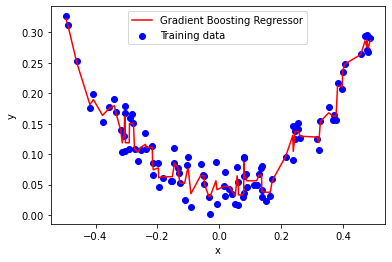

In [43]:
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred_gbr2, c='r', label='Gradient Boosting Regressor')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In this case, the model overfits the data too much and hence, it probably does not generalize well.

## Early Stopping

We train the gradient boosting regressor and perform a performance evaluation on the validation set after each iteration (i.e. after each increse of the amount of estimators, i.e. trees).

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [47]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(max_depth=2, n_estimators=120)

The function `staged_predict(X)` creates an iterable which contains the predicted target for the input `X` for each internal learning stage (in this case, each stage represents adding an additional tree as an additional `n_estimators`). We pick the best model by choosing the number of trees which minimizes the mean squared error.

In [50]:
errors = [mean_squared_error(y_val, y_predict) for y_predict in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

Plot the validation error over the number of trees used for training:

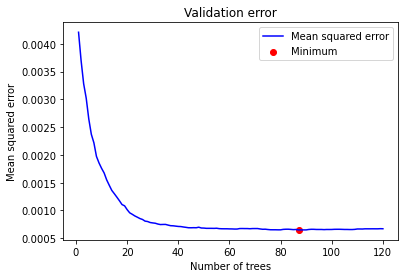

In [59]:
plt.clf()
plt.plot(range(1, len(errors)+1), errors, c='b', label='Mean squared error')
plt.scatter(best_n_estimators, errors[best_n_estimators-1], c='r', label='Minimum')
plt.xlabel('Number of trees')
plt.ylabel('Mean squared error')
plt.title('Validation error')
plt.legend()
plt.show()

Retrain the model with the optimized number of trees.

In [53]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(max_depth=2, n_estimators=87)

Plot the model that is trained with the optimized number of trees:

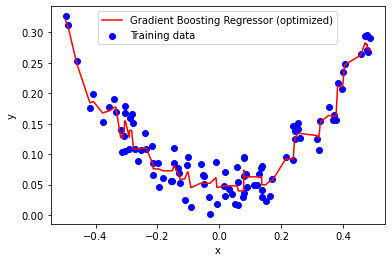

In [54]:
y_pred_gbrt = gbrt.predict(X_pred)
plt.clf()
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred_gbrt, c='r', label='Gradient Boosting Regressor (optimized)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Early stopping by actually stopping early

We can implement an actual early stopping, i.e. we stop once the error increases again after the next iteration. With `warm_start=True`, the regressor continues to train where it last stopped the training.<br>
In our implementation, we count the number `error_going_up` of times that the error of the current iteration is again above the error of the previous iterations. If the error is higher than the lowest error for `error_going_up=5` subsequent times, we early-stop the training.

In [60]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train.ravel())
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        error_going_up = 0
        val_error = min_val_error
    else:
        error_going_up += 1
        if error_going_up >= 5:
            break

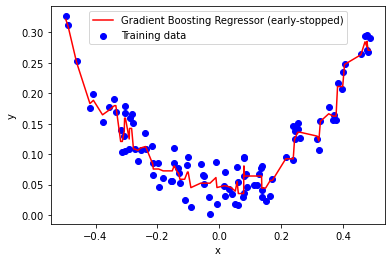

In [61]:
y_pred_gbrt = gbrt.predict(X_pred)
plt.clf()
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred_gbrt, c='r', label='Gradient Boosting Regressor (early-stopped)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## XGBoost - Extreme Gradient Boosting

In [82]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_pred)

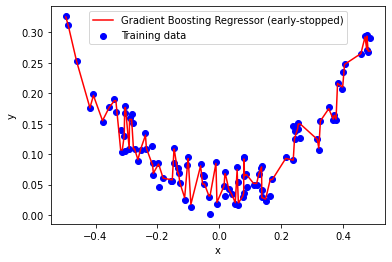

In [83]:
plt.clf()
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred, c='r', label='Gradient Boosting Regressor (early-stopped)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In this configuration, it seems that the regressor is overfitting the training data though.

### Early stopping with XGBoost

In [84]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_pred)

[0]	validation_0-rmse:0.28868
[1]	validation_0-rmse:0.20609
[2]	validation_0-rmse:0.14737
[3]	validation_0-rmse:0.10543
[4]	validation_0-rmse:0.07651
[5]	validation_0-rmse:0.05673
[6]	validation_0-rmse:0.04403
[7]	validation_0-rmse:0.03646
[8]	validation_0-rmse:0.03149
[9]	validation_0-rmse:0.02896
[10]	validation_0-rmse:0.02719
[11]	validation_0-rmse:0.02662
[12]	validation_0-rmse:0.02606
[13]	validation_0-rmse:0.02612
[14]	validation_0-rmse:0.02578
[15]	validation_0-rmse:0.02587
[16]	validation_0-rmse:0.02571
[17]	validation_0-rmse:0.02583
[18]	validation_0-rmse:0.02595


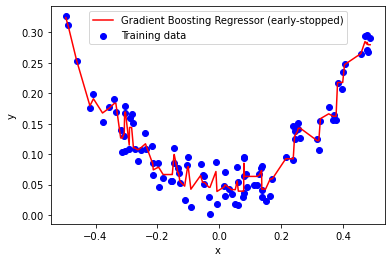

In [85]:
plt.clf()
plt.scatter(X, y, c='b', label='Training data')
plt.plot(X_pred, y_pred, c='r', label='Gradient Boosting Regressor (early-stopped)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In this case, the early stopping makes a lot of sense since compared with the XGBoost trained regressor above, the one here does not feature such strong overfitting.